In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
%pylab inline
%matplotlib inline
count = 1
def segmentation(datasetPath,imgName):
    print("processing: "+datasetPath+imgName)
    origin_img = cv2.imread(datasetPath+imgName)

# 白边框
    origin_img = cv2.copyMakeBorder(origin_img,100,100,100,100,cv2.BORDER_CONSTANT,value=(220,220,220))   
    img = origin_img.copy()
    
    
    #增亮度
#     M=np.ones(img.shape,dtype='uint8')*80
#     img=cv2.add(M,img)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #gray = cv2.equalizeHist(gray)
    #gray = cv2.normalize(gray,dst=None,alpha=350,beta=10,norm_type=cv2.NORM_MINMAX)

    
    # #先获取白色背景

    # gray_values = []
    # for i in range(gray.shape[0]):
    #     for j in range(gray.shape[1]):
    #         gray_values.append(gray[i][j])
    # gray_values.sort()
    # mid_value = gray_values[int(len(gray_values)/2)]
    # print(mid_value)

    # for i in range(gray.shape[0]):
    #     for j in range(gray.shape[1]):
    #         if gray[i][j]>mid_value:
    #             gray[i][j] = 255
    #         else:
    #             gray[i][j] = 0

    #转灰度 高糊
    blurred = cv2.GaussianBlur(gray, (9, 9),0) 
    ret,blurred = cv2.threshold(blurred, 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    blurred = cv2.GaussianBlur(blurred, (9, 9),0) 
    ret,blurred = cv2.threshold(blurred, 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    blurred = cv2.GaussianBlur(blurred, (9, 9),0) 
    ret,blurred = cv2.threshold(blurred, 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    plt.imshow(blurred)

    # #提取梯度
    # gradX = cv2.Sobel(blurred, ddepth=cv2.CV_32F, dx=1, dy=0)
    # gradY = cv2.Sobel(blurred, ddepth=cv2.CV_32F, dx=0, dy=1)

    # gradient = cv2.subtract(gradX, gradY)
    # gradient = cv2.convertScaleAbs(gradient)

    # plt.imshow(gradient)


    #blurred = cv2.GaussianBlur(gradient, (9, 9),0)
    (_, thresh) = cv2.threshold(blurred, 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    plt.imshow(thresh)

    #腐蚀膨胀的核
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    plt.imshow(closed)

    #腐蚀膨胀
    closed = cv2.erode(closed, None, iterations=2)
    closed = cv2.dilate(closed, None, iterations=2)
    plt.imshow(closed)

    #分割
    (_,contours,_) = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE,)
    #print(len(contours))

    #在原图上绘图
    img = origin_img.copy()
    global count
    for c in contours:
        if cv2.arcLength(c, True) >500 and cv2.arcLength(c, True) < 5000 :
            #print(cv2.arcLength(c, True))
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 8)
            crop_img= origin_img[y:y+h, x:x+w]
            cv2.imwrite('../../data/imgNew/imgFromSeg/'+str(count)+".jpg",crop_img) 
            count+=1
    plt.imshow(img)
    plt.show

Populating the interactive namespace from numpy and matplotlib


processing: ../../data/imgNew/imgScene/WIN_20191109_17_53_45_Pro.jpg


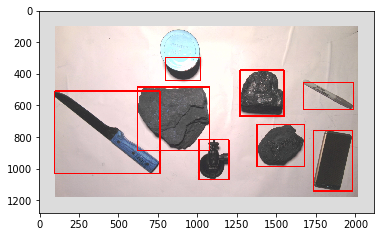

In [13]:
datasetPath = "../../data/imgNew/imgScene/"
count = 1
with open(datasetPath+'names.txt') as file:
    for line in file.readlines():
        if line is not "":
            img = cv2.imread(datasetPath+line.replace("\n",""))
            #print(np.array(img).shape)
            segmentation(datasetPath,line.replace("\n",""))
        
            

In [105]:
img = cv2.imread("../../data/imgSaved/test_pure/ (100).jpg")
np.array(img).shape

(1080, 1920, 3)

In [1]:
import cv2
cap = cv2.VideoCapture("../../data/video/WIN_20191109_14_51_12_Pro.mp4")
print(cap.get(cv2.CAP_PROP_FRAME_COUNT))

773.0
